In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

Some data:
 - Colormap
 - (azimuth, range) coordinate
 - (x, y) equivalent in Cartesian coordinate
 - Some face reflectivity values

In [2]:
bgColor = (0.89, 0.87, 0.83)
zmap = [
    bgColor,
    (0.20, 1.00, 1.00),
    (0.20, 0.60, 1.00),
    (0.00, 0.00, 1.00),
    (0.30, 1.00, 0.00),
    (0.10, 0.80, 0.00),
    (0.00, 0.60, 0.00),
    (1.00, 1.00, 0.00),
    (1.00, 0.75, 0.00),
    (1.00, 0.50, 0.00),
    (1.00, 0.00, 0.00),
    (0.75, 0.00, 0.00),
    (0.50, 0.00, 0.00),
    (1.00, 0.00, 0.80),
    (0.60, 0.30, 1.00),
    (1.00, 1.00, 1.00)
]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('zmap', zmap, N=len(zmap))
a, r = np.mgrid[slice(0, 2.0 * np.pi,  np.pi / 180.0), slice(0, 1000, 0.25)]
x = r * np.sin(a)
y = r * np.cos(a)
z = r * 0.075
# Duplicate the first azimuth and append it to the end
xx = np.append(x, x[0:1, :], axis=0)
yy = np.append(y, y[0:1, :], axis=0)
zz = np.append(z, z[0:1, :], axis=0)

In [3]:
%matplotlib inline

In [4]:
def showPPI(x, y, v):
    w = 6
    h = 6.5
    fig = plt.figure(figsize=(w, h), dpi=144, facecolor=None)
    if w > h:
        rect = [0.14, 0.1, 0.8 * h / w, 0.8]
    else:
        rect = [0.14, 0.1, 0.8, 0.8 * w / h]
    rect = [round(x * 72.0) / 72.0 + 0.5 / 72.0 for x in rect]
    ax = plt.axes(rect, facecolor=bgColor)
    pc = plt.pcolormesh(x, y, v, vmin=0.0, vmax=80.0, axes=ax, cmap=cmap)
    ax2 = plt.axes(rect, facecolor=None, frameon=False, sharex=ax, sharey=ax)
    plt.xlabel('X Distance (km)', axes=ax2)
    plt.ylabel('Y Distance (km)', axes=ax2)
    # pos = fig.add_axes((0.88, 0.3, 0.03, 0.5))
    cax = fig.add_axes((rect[0], rect[1] + rect[3] + 0.06, rect[2], 0.03))
    cb = plt.colorbar(ax=ax2, cax=cax, orientation='horizontal')
    # ax2.set_title('Example Reflectivity')
    cax.set_title('Example Reflectivity (dBZ)')
    dic = {'figure':fig, 'axes':ax, 'pcolor':pc, 'coloraxes':cax, 'colobar':cb}
    return dic

In [5]:
# matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = ['Arial']
matplotlib.rcParams['font.sans-serif'] = ['System Font', 'Verdana', 'Arial']
matplotlib.rc('text', usetex=False)

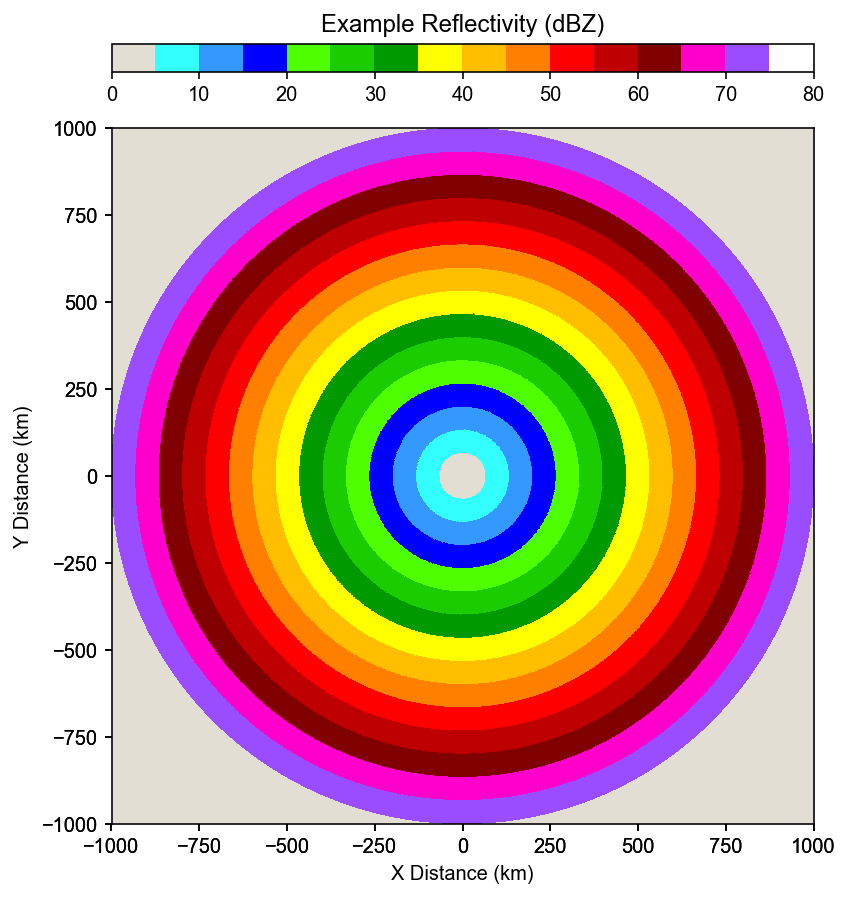

In [6]:
ppi = showPPI(xx, yy, z)
plt.show()

In [7]:
zmod = z
zmod[z < 10] = -999.0
zmod[0:20, :] = -999.0

In [8]:
ppi

{'axes': <matplotlib.axes._axes.Axes at 0x10df014e0>,
 'colobar': <matplotlib.colorbar.Colorbar at 0x115c1e908>,
 'coloraxes': <matplotlib.axes._axes.Axes at 0x115bb1390>,
 'figure': <matplotlib.figure.Figure at 0x10df035f8>,
 'pcolor': <matplotlib.collections.QuadMesh at 0x10df03898>}

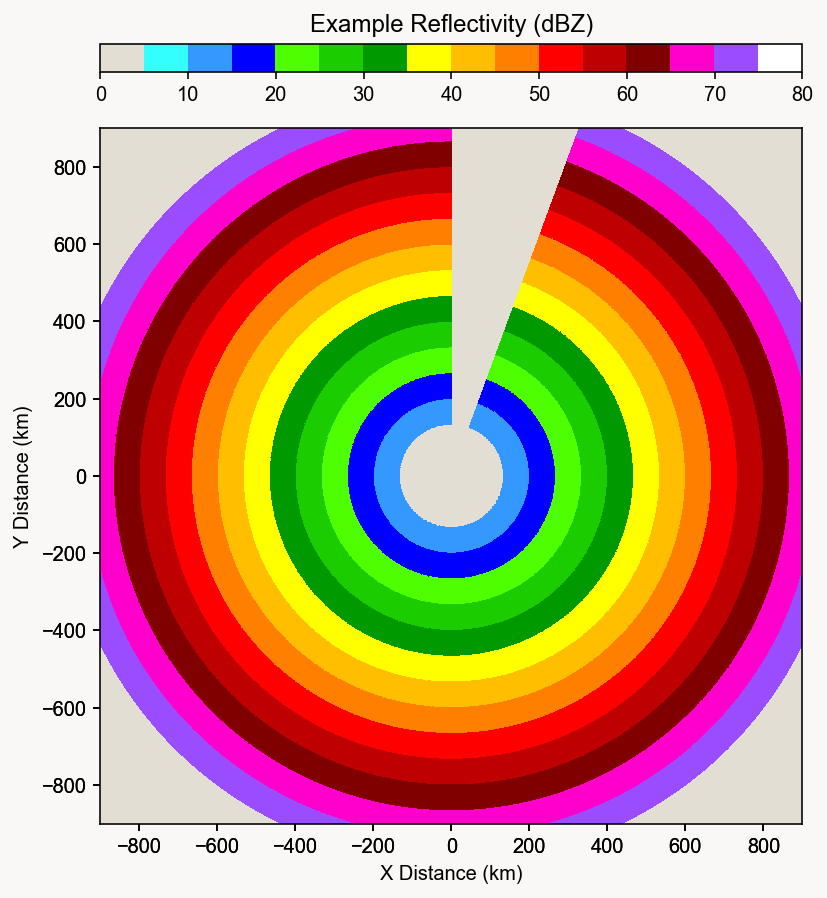

In [10]:
ppi = showPPI(xx, yy, zmod)
ppi['axes'].set_ylim([-900, 900])
ppi['axes'].set_xlim([-900, 900])
ppi['figure'].patch.set_facecolor(bgColor)
ppi['figure'].patch.set_alpha(0.2)
plt.show()